# Analysis on Indian Startup funding

# Definition of the problem

Analysing the data on funding startups received in India from the year 2018 to 2021.

# Hypotheses
Null Hypothesis, H0: There is no relationship between Amount sourced and Industry

Alternative Hypothesis, H1: There is a relationship between Amount sourced and Industry

# Questions
1. Which Industry received the highest funding?

2. Is there a relationship between the Age of Company and Amount of funding sourced?

3. Which investors give the highest funding?

4. Is location a factor in sourcing funding?

5. Which type of funding is mostly accessed?

6. Which sector attract more investors

# Importation

In [98]:
# Data handling
import pandas as pd
import numpy as np
import re
# Vizualisation (Matplotlib, Plotly, Seaborn, etc. )
import matplotlib.pyplot as plt
import seaborn as sns

# Data Loading

In [99]:
df_2018 = pd.read_csv(r"C:\Users\Nathaniel Havim\Desktop\Azubi\LP1 Week one\startup_funding2018.csv")
df_2019 = pd.read_csv(r"C:\Users\Nathaniel Havim\Desktop\Azubi\LP1 Week one\startup_funding2019.csv")
df_2020 = pd.read_csv(r"C:\Users\Nathaniel Havim\Desktop\Azubi\LP1 Week one\startup_funding2020.csv")
df_2021 = pd.read_csv(r"C:\Users\Nathaniel Havim\Desktop\Azubi\LP1 Week one\startup_funding2021.csv")

# Exploratory Data Analysis

### Overview of 2018 Datasets

In [100]:
df_2018.head(50) # Inspecting the first 50 rows 

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...
5,Hasura,"Cloud Infrastructure, PaaS, SaaS",Seed,1600000,"Bengaluru, Karnataka, India",Hasura is a platform that allows developers to...
6,Tripshelf,"Internet, Leisure, Marketplace",Seed,"₹16,000,000","Kalkaji, Delhi, India",Tripshelf is an online market place for holida...
7,Hyperdata.IO,Market Research,Angel,"₹50,000,000","Hyderabad, Andhra Pradesh, India",Hyperdata combines advanced machine learning w...
8,Freightwalla,"Information Services, Information Technology",Seed,—,"Mumbai, Maharashtra, India",Freightwalla is an international forwarder tha...
9,Microchip Payments,Mobile Payments,Seed,—,"Bangalore, Karnataka, India",Microchip payments is a mobile-based payment a...


In [101]:
df_2018.info() # Summary of the 2018 dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company Name   526 non-null    object
 1   Industry       526 non-null    object
 2   Round/Series   526 non-null    object
 3   Amount         526 non-null    object
 4   Location       526 non-null    object
 5   About Company  526 non-null    object
dtypes: object(6)
memory usage: 24.8+ KB


### Overview of 2019 Datasets

In [102]:
df_2019.head(50) # Inspecting the first 50 rows

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN
5,FlytBase,NaN,Pune,Technology,A drone automation platform,Nitin Gupta,Undisclosed,Undisclosed,NaN
6,Finly,NaN,Bangalore,SaaS,It builds software products that makes work si...,"Vivek AG, Veekshith C Rai","Social Capital, AngelList India, Gemba Capital...",Undisclosed,NaN
7,Kratikal,2013.0,Noida,Technology,It is a product-based cybersecurity solutions ...,"Pavan Kushwaha, Paratosh Bansal, Dip Jung Thapa","Gilda VC, Art Venture, Rajeev Chitrabhanu.","$1,000,000",Pre series A
8,Quantiphi,NaN,NaN,AI & Tech,It is an AI and big data services company prov...,Renuka Ramnath,Multiples Alternate Asset Management,"$20,000,000",Series A
9,Lenskart,2010.0,Delhi,E-commerce,It is a eyewear company,"Peyush Bansal, Amit Chaudhary, Sumeet Kapahi",SoftBank,"$275,000,000",Series G


In [103]:
df_2019.info() # summary of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  89 non-null     object 
 1   Founded        60 non-null     float64
 2   HeadQuarter    70 non-null     object 
 3   Sector         84 non-null     object 
 4   What it does   89 non-null     object 
 5   Founders       86 non-null     object 
 6   Investor       89 non-null     object 
 7   Amount($)      89 non-null     object 
 8   Stage          43 non-null     object 
dtypes: float64(1), object(8)
memory usage: 6.4+ KB


### Overview of 2020 Datasets

In [104]:
df_2020.head(50) # Inspecting the first 50 rows of the 2020 dataframe

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Unnamed: 9
0,Aqgromalin,2019,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,"$200,000",NaN,NaN
1,Krayonnz,2019,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,"$100,000",Pre-seed,NaN
2,PadCare Labs,2018,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,Undisclosed,Pre-seed,NaN
3,NCOME,2020,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital","$400,000",NaN,NaN
4,Gramophone,2016,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge","$340,000",NaN,NaN
5,qZense,2019,Bangalore,AgriTech,qZense Labs is building the next-generation Io...,"Rubal Chib, Dr Srishti Batra","Venture Catalysts, 9Unicorns Accelerator Fund","$600,000",Seed,NaN
6,MyClassboard,2008,Hyderabad,EdTech,MyClassboard is a full-fledged School / Colleg...,Ajay Sakhamuri,ICICI Bank.,"$600,000",Pre-series A,NaN
7,Metvy,2018,Gurgaon,Networking platform,AI driven networking platform for individuals ...,Shawrya Mehrotra,HostelFund,Undisclosed,Pre-series,NaN
8,Rupeek,2015,Bangalore,FinTech,Rupeek is an online lending platform that spec...,"Amar Prabhu, Ashwin Soni, Sumit Maniyar","KB Investment, Bertelsmann India Investments","$45,000,000",Series C,NaN
9,Gig India,2017,Pune,Crowdsourcing,GigIndia is a marketplace that provides on-dem...,"Aditya Shirole, Sahil Sharma","Shantanu Deshpande, Subramaniam Ramadorai","$1,000,000",Pre-series A,NaN


In [105]:
df_2020.info() # Show the summary of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company/Brand  1055 non-null   object
 1   Founded        843 non-null    object
 2   HeadQuarter    961 non-null    object
 3   Sector         1042 non-null   object
 4   What it does   1055 non-null   object
 5   Founders       1043 non-null   object
 6   Investor       1017 non-null   object
 7   Amount($)      1052 non-null   object
 8   Stage          591 non-null    object
 9   Unnamed: 9     2 non-null      object
dtypes: object(10)
memory usage: 82.5+ KB


### Overview of 2021 dataframe

In [106]:
df_2021.head(50) #Inspecting the first 50 rows of the 2021 dataframe

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",NaN
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed
5,Urban Company,2014.0,New Delhi,Home services,Urban Company (Formerly UrbanClap) is a home a...,"Abhiraj Singh Bhal, Raghav Chandra, Varun Khaitan",Vy Capital,"$188,000,000",NaN
6,Comofi Medtech,2018.0,Bangalore,HealthTech,Comofi Medtech is a healthcare robotics startup.,Gururaj KB,"CIIE.CO, KIIT-TBI","$200,000",NaN
7,Qube Health,2016.0,Mumbai,HealthTech,India's Most Respected Workplace Healthcare Ma...,Gagan Kapur,Inflection Point Ventures,Undisclosed,Pre-series A
8,Vitra.ai,2020.0,Bangalore,Tech Startup,Vitra.ai is an AI-based video translation plat...,Akash Nidhi PS,Inflexor Ventures,Undisclosed,NaN
9,Taikee,2010.0,Mumbai,E-commerce,"Taikee is the ISO-certified, B2B e-commerce pl...","Nidhi Ramachandran, Sachin Chhabra",NaN,"$1,000,000",NaN


In [107]:
df_2021.info() #show the summary of the 2021 dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  1209 non-null   object 
 1   Founded        1208 non-null   float64
 2   HeadQuarter    1208 non-null   object 
 3   Sector         1209 non-null   object 
 4   What it does   1209 non-null   object 
 5   Founders       1205 non-null   object 
 6   Investor       1147 non-null   object 
 7   Amount($)      1206 non-null   object 
 8   Stage          781 non-null    object 
dtypes: float64(1), object(8)
memory usage: 85.1+ KB


# Notes:
      1.The column names in 2018 dataset do not match with the other datasets
      2. Match columns 2018 and 2020 dataframe to other datasets
      3. Change Industry column in 2018 dataset to Sector and split elements in Sector column and select only the first element
      4. Change Location column in 2018 dataset Headquater and slit elements in Headquarter column and chose only the first element
      5. Changing the data types on Amount column to float
      6. Convert Amount in Rupee to Dollars
      7. Cleaning the different dataset
      8. Drop the unamed column in 2020 dataset
      9. Append the dataframes

# Feature processing
Here is the section to clean and process the features of the dataset

## Cleaning 2018 dataset

### Renaming columns for 2018 dataframe to match with other dataframes

In [108]:
# columns to change Company Name to Company/Brand,Industry to Sector,Amount to Amount($),Round/Series to Stage,Location to HeadQuarter,About Company to What it does
df_2018 = df_2018.rename(columns = {'Company Name': 'Company/Brand', 
                                    'Industry': 'Sector', 'Amount':'Amount($)',
                                    'Round/Series': 'Stage',
                                   'Location':'HeadQuarter', 
                                    'About Company':'What it does' })
                         
df_2018.head()

,Company/Brand,Sector,Stage,Amount($),HeadQuarter,What it does
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...


### Creating New Columns that do not exist in 2018 dataframe

In [109]:
# Create new columns -- Founded, Founders & Investors
Added_columns = ['Founded', 'Founders', 'Investors']
for column in Added_columns:
    df_2018[column] = (np.nan)
df_2018

,Company/Brand,Sector,Stage,Amount($),HeadQuarter,What it does,Founded,Founders,Investors
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",NaN,NaN,NaN
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...,NaN,NaN,NaN
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India,NaN,NaN,NaN
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...,NaN,NaN,NaN
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
521,Udaan,"B2B, Business Development, Internet, Marketplace",Series C,225000000,"Bangalore, Karnataka, India","Udaan is a B2B trade platform, designed specif...",NaN,NaN,NaN
522,Happyeasygo Group,"Tourism, Travel",Series A,—,"Haryana, Haryana, India",HappyEasyGo is an online travel domain.,NaN,NaN,NaN
523,Mombay,"Food and Beverage, Food Delivery, Internet",Seed,7500,"Mumbai, Maharashtra, India",Mombay is a unique opportunity for housewives ...,NaN,NaN,NaN
524,Droni Tech,Information Technology,Seed,"₹35,000,000","Mumbai, Maharashtra, India",Droni Tech manufacture UAVs and develop softwa...,NaN,NaN,NaN


In [110]:
df_2018.info() #Checking the new 2018 dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  526 non-null    object 
 1   Sector         526 non-null    object 
 2   Stage          526 non-null    object 
 3   Amount($)      526 non-null    object 
 4   HeadQuarter    526 non-null    object 
 5   What it does   526 non-null    object 
 6   Founded        0 non-null      float64
 7   Founders       0 non-null      float64
 8   Investors      0 non-null      float64
dtypes: float64(3), object(6)
memory usage: 37.1+ KB


In [111]:
# Changing columns from float to string
df_2018['Founders']=df_2018['Founders'].astype(str)
df_2018['Investors']=df_2018['Investors'].astype(str)

In [112]:
df_2018['Sector'].unique # Inspecting the values in the 2018 Sector column

<bound method Series.unique of 0      Brand Marketing, Event Promotion, Marketing, S...
1                                   Agriculture, Farming
2       Credit, Financial Services, Lending, Marketplace
3                            Financial Services, FinTech
4                     E-Commerce Platforms, Retail, SaaS
                             ...                        
521     B2B, Business Development, Internet, Marketplace
522                                      Tourism, Travel
523           Food and Beverage, Food Delivery, Internet
524                               Information Technology
525           Biotechnology, Health Care, Pharmaceutical
Name: Sector, Length: 526, dtype: object>

In [113]:
#TSplit the sector column and pick only the first values separated by comma (',')to match the rest dataframes
df_2018['Sector'] = df_2018['Sector'].apply(lambda x: x.split(',')[0])
df_2018.head() # Calling the 2018 dataframe to inspect the changes

,Company/Brand,Sector,Stage,Amount($),HeadQuarter,What it does,Founded,Founders,Investors
0,TheCollegeFever,Brand Marketing,Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",NaN,nan,nan
1,Happy Cow Dairy,Agriculture,Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...,NaN,nan,nan
2,MyLoanCare,Credit,Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India,NaN,nan,nan
3,PayMe India,Financial Services,Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...,NaN,nan,nan
4,Eunimart,E-Commerce Platforms,Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...,NaN,nan,nan


In [114]:
# Split HeadQuarter column and select only the first values separated by (',')to match the rest dataframes
df_2018['HeadQuarter'] = df_2018['HeadQuarter'].apply(lambda x: x.split(',')[0])
df_2018.head()

,Company/Brand,Sector,Stage,Amount($),HeadQuarter,What it does,Founded,Founders,Investors
0,TheCollegeFever,Brand Marketing,Seed,250000,Bangalore,"TheCollegeFever is a hub for fun, fiesta and f...",NaN,nan,nan
1,Happy Cow Dairy,Agriculture,Seed,"₹40,000,000",Mumbai,A startup which aggregates milk from dairy far...,NaN,nan,nan
2,MyLoanCare,Credit,Series A,"₹65,000,000",Gurgaon,Leading Online Loans Marketplace in India,NaN,nan,nan
3,PayMe India,Financial Services,Angel,2000000,Noida,PayMe India is an innovative FinTech organizat...,NaN,nan,nan
4,Eunimart,E-Commerce Platforms,Seed,—,Hyderabad,Eunimart is a one stop solution for merchants ...,NaN,nan,nan


In [115]:
# Cleaning Amount column in 2018 dataframe
def refinedamount(df_2018):
    df_2018['Amount($)'] = df_2018['Amount($)'].apply(lambda x: str(x).replace('—','NaN').replace(',','').replace('$',''))

refinedamount(df_2018)

#converting ₹ to $       
df_2018['Amount($)']=df_2018['Amount($)'].apply(
    lambda x: float(str(x).replace('₹',''))*0.0146 if '₹' in x
else x)

# convert Amount to float
df_2018['Amount($)']=df_2018['Amount($)'].astype(float)

In [116]:
# Cheching if Amount column is in float
df_2018['Amount($)']

0         250000.0
1         584000.0
2         949000.0
3        2000000.0
4              NaN
          ...     
521    225000000.0
522            NaN
523         7500.0
524       511000.0
525     35000000.0
Name: Amount($), Length: 526, dtype: float64

In [117]:
# Replacing NaN values with 0
df_2018['Amount($)'].fillna(0)

0         250000.0
1         584000.0
2         949000.0
3        2000000.0
4              0.0
          ...     
521    225000000.0
522            0.0
523         7500.0
524       511000.0
525     35000000.0
Name: Amount($), Length: 526, dtype: float64

In [118]:
df_2018['Stage'].unique()

array(['Seed', 'Series A', 'Angel', 'Series B', 'Pre-Seed',
       'Private Equity', 'Venture - Series Unknown', 'Grant',
       'Debt Financing', 'Post-IPO Debt', 'Series H', 'Series C',
       'Series E', 'Corporate Round', 'Undisclosed',
       'https://docs.google.com/spreadsheets/d/1x9ziNeaz6auNChIHnMI8U6kS7knTr3byy_YBGfQaoUA/edit#gid=1861303593',
       'Series D', 'Secondary Market', 'Post-IPO Equity',
       'Non-equity Assistance', 'Funding Round'], dtype=object)

In [119]:
# Correcting a wrong entry in the Stage elements
df_2018['Stage'] = df_2018['Stage'].replace('https://docs.google.com/spreadsheets/d/1x9ziNeaz6auNChIHnMI8U6kS7knTr3byy_YBGfQaoUA/edit#gid=1861303593','Seed')
df_2018['Stage'].unique()# Checking the updated Stage elements

array(['Seed', 'Series A', 'Angel', 'Series B', 'Pre-Seed',
       'Private Equity', 'Venture - Series Unknown', 'Grant',
       'Debt Financing', 'Post-IPO Debt', 'Series H', 'Series C',
       'Series E', 'Corporate Round', 'Undisclosed', 'Series D',
       'Secondary Market', 'Post-IPO Equity', 'Non-equity Assistance',
       'Funding Round'], dtype=object)

## Cleaning 2019 dataset

In [120]:
# Correcting Ecommerce to E-commerce in Sector column
df_2019['Sector'].replace('Ecommerce','E-commerce')

0                  E-commerce
1                      Edtech
2                      Edtech
3             Interior design
4                    AgriTech
               ...           
84                  Infratech
85                Hospitality
86    Automobile & Technology
87                 Automobile
88                    Banking
Name: Sector, Length: 89, dtype: object

In [121]:
# Calling refinedamount function to clean the Amount column for 2019 for to 2021 dataframe
refinedamount(df_2019)
refinedamount(df_2020)
refinedamount(df_2021)

In [122]:
# Calling the refined amount column
df_2019['Amount($)'].unique()

array(['6300000', '150000000', '28000000', '30000000', '6000000',
       'Undisclosed', '1000000', '20000000', '275000000', '22000000',
       '5000000', '140500', '540000000', '15000000', '182700', '12000000',
       '11000000', '15500000', '1500000', '5500000', '2500000', '140000',
       '230000000', '49400000', '32000000', '26000000', '150000',
       '400000', '2000000', '100000000', '8000000', '100000', '50000000',
       '120000000', '4000000', '6800000', '36000000', '5700000',
       '25000000', '600000', '70000000', '60000000', '220000', '2800000',
       '2100000', '7000000', '311000000', '4800000', '693000000',
       '33000000'], dtype=object)

In [123]:
# further cleaning amount column to replace Undisclosed with NaN
df_2019['Amount($)']=df_2019['Amount($)'].replace('Undisclosed','NaN')

In [124]:
# Converting the amount from string to float
df_2019['Amount($)']=df_2019['Amount($)'].astype(float)

In [125]:
df_2019['Amount($)']

0       6300000.0
1     150000000.0
2      28000000.0
3      30000000.0
4       6000000.0
         ...     
84     20000000.0
85    693000000.0
86      5000000.0
87     50000000.0
88     33000000.0
Name: Amount($), Length: 89, dtype: float64

## Cleaning 2020 dataframe

In [126]:
# Checking the amount column for further cleaning of the Amount column
df_2020['Amount($)'].unique

<bound method Series.unique of 0            200000
1            100000
2       Undisclosed
3            400000
4            340000
           ...     
1050        1500000
1051       13200000
1052        8000000
1053        8043000
1054        9000000
Name: Amount($), Length: 1055, dtype: object>

In [127]:
# Change Undisclosed amount to NaN 
df_2020['Amount($)']=df_2020['Amount($)'].replace('Undisclosed','NaN').replace('Undiclsosed','NaN').replace('Undislosed','NaN')

In [128]:
#887000 23000000
# Replace the average of double amount values in an entry for 887000 and 23000000
df_2020['Amount($)']=df_2020['Amount($)'].replace('887000 23000000','12387000').replace('800000000 to 850000000','1225000000')

In [129]:
df_2020['Amount($)']=df_2020['Amount($)'].astype(float)

In [130]:
df_2020['Founded']

0       2019
1       2019
2       2018
3       2020
4       2016
        ... 
1050     NaN
1051     NaN
1052    2012
1053    2015
1054    2017
Name: Founded, Length: 1055, dtype: object

In [131]:
#Clean Founded column and convert to float

def cleanCovertToFloat(entry):
    if entry == '-' or entry == 'nan' or entry =="''": # replace any —, nan or '' with np.nan
        return np.nan
    
    return float(entry) # else return that same value as float

# calling the cleanCovertFloat function on the 2020 Founded column
df_2020['Founded']=df_2020['Founded'].apply(cleanCovertToFloat)

In [132]:
df_2020['Founded']

0       2019.0
1       2019.0
2       2018.0
3       2020.0
4       2016.0
         ...  
1050       NaN
1051       NaN
1052    2012.0
1053    2015.0
1054    2017.0
Name: Founded, Length: 1055, dtype: float64

In [133]:
# Cheching the content of the extra column in 2020 dataset
df_2020['Unnamed: 9'].value_counts()

Pre-Seed      1
Seed Round    1
Name: Unnamed: 9, dtype: int64

In [134]:
df_2020.drop(['Unnamed: 9'], axis=1, inplace=True)

In [135]:
df_2020.columns

Index(['Company/Brand', 'Founded', 'HeadQuarter', 'Sector', 'What it does',
       'Founders', 'Investor', 'Amount($)', 'Stage'],
      dtype='object')

# Cleaning 2021 dataframe

In [136]:
df_2021['Amount($)'].unique()

array(['1200000', '120000000', '30000000', '51000000', '2000000',
       '188000000', '200000', 'Undisclosed', '1000000', '3000000',
       '100000', '700000', '9000000', '40000000', '49000000', '400000',
       '300000', '25000000', '160000000', '150000', '1800000', '5000000',
       '850000', '53000000', '500000', '1100000', '6000000', '800000',
       '10000000', '21000000', '7500000', '26000000', '7400000',
       '1500000', '600000', '800000000', '17000000', '3500000',
       '15000000', '215000000', '2500000', '350000000', '5500000',
       '83000000', '110000000', '500000000', '65000000', '150000000000',
       '300000000', '2200000', '35000000', '140000000', '4000000',
       '13000000', 'nan', '9500000', '8000000', 'Upsparks', '12000000',
       '1700000', '150000000', '100000000', '225000000', '6700000',
       '1300000', '20000000', '250000', '52000000', '3800000', '17500000',
       '42000000', '2300000', '7000000', '450000000', '28000000',
       '8500000', '37000000', '37

### Move misplaced element in Amount column to their respective columns

In [137]:
df_2021.loc[df_2021['Amount($)'] == 'Upsparks' ]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
98,FanPlay,2020.0,Computer Games,Computer Games,A real money game app specializing in trivia g...,YC W21,"Pritesh Kumar, Bharat Gupta",Upsparks,$1200000
111,FanPlay,2020.0,Computer Games,Computer Games,A real money game app specializing in trivia g...,YC W21,"Pritesh Kumar, Bharat Gupta",Upsparks,$1200000


In [138]:
df_2021.loc[df_2021['Company/Brand']=='FanPlay', ['Amount($)', 'Stage']] = ['$1200000', 'Upsparks']
df_2021.drop([98], axis=0, inplace=True)
df_2021.loc[df_2021['Company/Brand']=='FanPlay']

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
111,FanPlay,2020.0,Computer Games,Computer Games,A real money game app specializing in trivia g...,YC W21,"Pritesh Kumar, Bharat Gupta",$1200000,Upsparks


In [139]:
df_2021.loc[df_2021['Amount($)']=='ah! Ventures']

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
538,Little Leap,2020.0,New Delhi,EdTech,Soft Skills that make Smart Leaders,Holistic Development Programs for children in ...,Vishal Gupta,ah! Ventures,$300000


In [140]:
df_2021.loc[df_2021['Company/Brand']=='Little Leap',['Amount($)', 'Stage','Investor']]=['$300000',np.nan,'ah! Ventures']
df_2021.loc[df_2021['Company/Brand']=='Little Leap']

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
538,Little Leap,2020.0,New Delhi,EdTech,Soft Skills that make Smart Leaders,Holistic Development Programs for children in ...,ah! Ventures,$300000,NaN


In [141]:
df_2021.loc[df_2021['Amount($)']=='Pre-series A']

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
545,AdmitKard,2016.0,Noida,EdTech,A tech solution for end to end career advisory...,"Vamsi Krishna, Pulkit Jain, Gaurav Munjal\t#REF!",$1000000,Pre-series A,NaN


In [142]:
df_2021.loc[df_2021['Company/Brand']=='AdmitKard',['Amount($)', 'Stage', 'Investor']]=['$1000000', 'Pre-series A',np.nan]
df_2021.loc[df_2021['Company/Brand']=='AdmitKard']

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
545,AdmitKard,2016.0,Noida,EdTech,A tech solution for end to end career advisory...,"Vamsi Krishna, Pulkit Jain, Gaurav Munjal\t#REF!",NaN,$1000000,Pre-series A


In [143]:
df_2021.loc[df_2021['Amount($)']=='ITO Angel Network LetsVenture']

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
551,BHyve,2020.0,Mumbai,Human Resources,A Future of Work Platform for diffusing Employ...,Backed by 100x.VC,"Omkar Pandharkame, Ketaki Ogale",ITO Angel Network LetsVenture,$300000


In [144]:
df_2021.loc[df_2021['Company/Brand']=='BHyve', ['Amount($)', 'Stage']]=['$300000',np.nan ]
df_2021.loc[df_2021['Company/Brand']=='BHyve']

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
551,BHyve,2020.0,Mumbai,Human Resources,A Future of Work Platform for diffusing Employ...,Backed by 100x.VC,"Omkar Pandharkame, Ketaki Ogale",$300000,NaN


In [145]:
df_2021.loc[df_2021['Amount($)']=='JITO Angel Network LetsVenture']

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
677,Saarthi Pedagogy,2015.0,Ahmadabad,EdTech,"India's fastest growing Pedagogy company, serv...",Pedagogy,Sushil Agarwal,JITO Angel Network LetsVenture,$1000000


In [146]:
df_2021.loc[df_2021['Company/Brand']=='Saarthi Pedagogy', ['Amount($)', 'Stage']]=['$1000000',np.nan]
df_2021.loc[df_2021['Company/Brand']=='Saarthi Pedagogy']

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
677,Saarthi Pedagogy,2015.0,Ahmadabad,EdTech,"India's fastest growing Pedagogy company, serv...",Pedagogy,Sushil Agarwal,$1000000,NaN


In [147]:
df_2021.loc[df_2021['Amount($)']=='Seed']

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
257,MoEVing,2021.0,Gurugram\t#REF!,MoEVing is India's only Electric Mobility focu...,"Vikash Mishra, Mragank Jain","Anshuman Maheshwary, Dr Srihari Raju Kalidindi",$5000000,Seed,NaN
1148,Godamwale,2016.0,Mumbai,Logistics & Supply Chain,Godamwale is tech enabled integrated logistics...,"Basant Kumar, Vivek Tiwari, Ranbir Nandan",1000000\t#REF!,Seed,NaN


In [148]:
df_2021.loc[df_2021['Company/Brand']=='MoEVing', ['Amount($)','Sector','Investor']]=[5000000, 'Seed', np.nan]
df_2021.loc[df_2021['Company/Brand']=='Godamwale', ['Amount($)', 'Sector', 'Investor']]=[1000000, 'Seed', np.nan]
df_2021.loc[df_2021['Company/Brand']=='MoEVing']

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
257,MoEVing,2021.0,Gurugram\t#REF!,Seed,"Vikash Mishra, Mragank Jain","Anshuman Maheshwary, Dr Srihari Raju Kalidindi",NaN,5000000,NaN


In [149]:
df_2021.loc[df_2021['Company/Brand']=='Godamwale']

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
1148,Godamwale,2016.0,Mumbai,Seed,Godamwale is tech enabled integrated logistics...,"Basant Kumar, Vivek Tiwari, Ranbir Nandan",NaN,1000000,NaN


In [150]:
df_2021.loc[df_2021['Amount($)']=='Series C']

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
242,Fullife Healthcare,2009.0,Pharmaceuticals\t#REF!,Primary Business is Development and Manufactur...,Varun Khanna,Morgan Stanley Private Equity Asia,$22000000,Series C,NaN
256,Fullife Healthcare,2009.0,Pharmaceuticals\t#REF!,Primary Business is Development and Manufactur...,Varun Khanna,Morgan Stanley Private Equity Asia,$22000000,Series C,NaN


In [151]:
df_2021.loc[df_2021['Company/Brand']=='Fullife Healthcare', ['Amount($)', 'Stage', 'Investor']]=['$22000000', 'Series C', np.nan]
#df_2021.drop([256], axis=0, inplace=True)
df_2021.loc[df_2021['Company/Brand']=='Fullife Healthcare']

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
242,Fullife Healthcare,2009.0,Pharmaceuticals\t#REF!,Primary Business is Development and Manufactur...,Varun Khanna,Morgan Stanley Private Equity Asia,NaN,$22000000,Series C
256,Fullife Healthcare,2009.0,Pharmaceuticals\t#REF!,Primary Business is Development and Manufactur...,Varun Khanna,Morgan Stanley Private Equity Asia,NaN,$22000000,Series C


In [152]:
df_2021['Amount($)'] = df_2021['Amount($)'].apply(str)
df_2021['Amount($)'].replace('',0, inplace=True, regex=True)
df_2021['Amount($)'] = df_2021['Amount($)'].apply(lambda x: str(x).replace('$',''))
df_2021['Amount($)'].replace(',','',inplace=True, regex=True)
df_2021['Amount($)'].replace('Undisclosed',np.nan, inplace=True, regex=True)
df_2021['Amount($)'].replace('undisclosed',np.nan, inplace=True, regex=True)
df_2021['Amount($)'].replace('Undisclsosed',np.nan, inplace=True, regex=True)
df_2021['Amount($)'].replace('Undislosed',np.nan, inplace=True, regex=True)
df_2021['Amount($)'].replace('nan',np.nan, inplace=True, regex=True)
df_2021['Amount($)']=df_2021['Amount($)'].replace('',np.nan).astype(float)

In [153]:
df_2021['Amount($)']

0         1200000.0
1       120000000.0
2        30000000.0
3        51000000.0
4         2000000.0
           ...     
1204      3000000.0
1205     20000000.0
1206     55000000.0
1207     26000000.0
1208      8000000.0
Name: Amount($), Length: 1208, dtype: float64

### Create year column for all the datasets

In [154]:
df_2018['Year']=2018
df_2019['Year']=2019
df_2020['Year']=2020
df_2021['Year']=2021

### Merging all the dataframes

In [155]:
# Using the concat() funtion to combine all the different dataframes
data=pd.concat([df_2018,df_2019,df_2020,df_2021], ignore_index=True)

In [156]:
# Inspecting the new columns
data.columns

Index(['Company/Brand', 'Sector', 'Stage', 'Amount($)', 'HeadQuarter',
       'What it does', 'Founded', 'Founders', 'Investors', 'Year', 'Investor'],
      dtype='object')

In [157]:
# Having an overview of the merged dataframe
data

,Company/Brand,Sector,Stage,Amount($),HeadQuarter,What it does,Founded,Founders,Investors,Year,Investor
0,TheCollegeFever,Brand Marketing,Seed,250000.0,Bangalore,"TheCollegeFever is a hub for fun, fiesta and f...",NaN,nan,nan,2018,NaN
1,Happy Cow Dairy,Agriculture,Seed,584000.0,Mumbai,A startup which aggregates milk from dairy far...,NaN,nan,nan,2018,NaN
2,MyLoanCare,Credit,Series A,949000.0,Gurgaon,Leading Online Loans Marketplace in India,NaN,nan,nan,2018,NaN
3,PayMe India,Financial Services,Angel,2000000.0,Noida,PayMe India is an innovative FinTech organizat...,NaN,nan,nan,2018,NaN
4,Eunimart,E-Commerce Platforms,Seed,NaN,Hyderabad,Eunimart is a one stop solution for merchants ...,NaN,nan,nan,2018,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2873,Gigforce,Staffing & Recruiting,Pre-series A,3000000.0,Gurugram,A gig/on-demand staffing company.,2019.0,"Chirag Mittal, Anirudh Syal",NaN,2021,Endiya Partners
2874,Vahdam,Food & Beverages,Series D,20000000.0,New Delhi,VAHDAM is among the world’s first vertically i...,2015.0,Bala Sarda,NaN,2021,IIFL AMC
2875,Leap Finance,Financial Services,Series C,55000000.0,Bangalore,International education loans for high potenti...,2019.0,"Arnav Kumar, Vaibhav Singh",NaN,2021,Owl Ventures
2876,CollegeDekho,EdTech,Series B,26000000.0,Gurugram,"Collegedekho.com is Student’s Partner, Friend ...",2015.0,Ruchir Arora,NaN,2021,"Winter Capital, ETS, Man Capital"


# Univariate Analysis
‘Univariate analysis’ is the analysis of one variable at a time. This analysis might be done by computing some statistical indicators and by plotting some charts respectively using the pandas dataframe's method .describe() and one of the plotting libraries like Seaborn, Matplotlib, Plotly, etc.

Please, read this article to know more about the charts.

In [158]:
# The description of the data
data.describe()

,Amount($),Founded,Year
count,2.329000e+03,2109.000000,2878.000000
mean,1.209281e+08,2016.077762,2020.023280
std,3.430451e+09,4.368207,1.087011
min,0.000000e+00,1963.000000,2018.000000
25%,1.000000e+06,2015.000000,2020.000000
50%,3.000000e+06,2017.000000,2020.000000
75%,1.200000e+07,2019.000000,2021.000000
max,1.500000e+11,2021.000000,2021.000000


### Checking each column for further decision

In [159]:
# Inspecting unexpected column
data['Investors'].unique()

array(['nan', nan], dtype=object)

In [160]:
# Dropping unexpected column
data.drop(['Investors'], axis=1, inplace=True)

In [161]:
with pd.option_context('display.max_row', None):
    print(data)

                                          Company/Brand  \
0                                       TheCollegeFever   
1                                       Happy Cow Dairy   
2                                            MyLoanCare   
3                                           PayMe India   
4                                              Eunimart   
5                                                Hasura   
6                                             Tripshelf   
7                                          Hyperdata.IO   
8                                          Freightwalla   
9                                    Microchip Payments   
10                           BizCrum Infotech Pvt. Ltd.   
11                                              Emojifi   
12                                                Flock   
13                                            Freshboxx   
14                           Wide Mobility Mechatronics   
15                                              Pitstop 

In [162]:
data['Amount($)']

0         250000.0
1         584000.0
2         949000.0
3        2000000.0
4              NaN
           ...    
2873     3000000.0
2874    20000000.0
2875    55000000.0
2876    26000000.0
2877     8000000.0
Name: Amount($), Length: 2878, dtype: float64

In [163]:
data['Amount($)'].describe()

count    2.329000e+03
mean     1.209281e+08
std      3.430451e+09
min      0.000000e+00
25%      1.000000e+06
50%      3.000000e+06
75%      1.200000e+07
max      1.500000e+11
Name: Amount($), dtype: float64

In [164]:
with pd.option_context('display.max_row', None):
    print(data['Sector'])

0                                         Brand Marketing
1                                             Agriculture
2                                                  Credit
3                                      Financial Services
4                                    E-Commerce Platforms
5                                    Cloud Infrastructure
6                                                Internet
7                                         Market Research
8                                    Information Services
9                                         Mobile Payments
10                                                    B2B
11                                               Internet
12                                                   Apps
13                                          Food Delivery
14                                  Industrial Automation
15                                             Automotive
16                                                Finance
17            

In [165]:
# Clean the Sector column
data['Sector']=data['Sector'].str.capitalize()

In [166]:
data['Sector'].unique()

array(['Brand marketing', 'Agriculture', 'Credit', 'Financial services',
       'E-commerce platforms', 'Cloud infrastructure', 'Internet',
       'Market research', 'Information services', 'Mobile payments',
       'B2b', 'Apps', 'Food delivery', 'Industrial automation',
       'Automotive', 'Finance', 'Accounting', 'Artificial intelligence',
       'Internet of things', 'Air transportation', 'Food and beverage',
       'Autonomous vehicles', 'Enterprise software', 'Logistics',
       'Insurance', 'Information technology', 'Blockchain', 'Education',
       'E-commerce', 'Renewable energy', 'E-learning', 'Clean energy',
       'Transportation', 'Fitness', 'Hospitality',
       'Media and entertainment', 'Broadcasting', 'Edtech', 'Health care',
       '—', 'Sports', 'Big data', 'Cloud computing', 'Food processing',
       'Trading platform', 'Consumer goods', 'Wellness', 'Fashion',
       'Consulting', 'Biotechnology', 'Communities', 'Consumer',
       'Consumer applications', 'Mobile',

In [167]:
with pd.option_context('display.max_row', None):
    print(data['Sector'])

0                                         Brand marketing
1                                             Agriculture
2                                                  Credit
3                                      Financial services
4                                    E-commerce platforms
5                                    Cloud infrastructure
6                                                Internet
7                                         Market research
8                                    Information services
9                                         Mobile payments
10                                                    B2b
11                                               Internet
12                                                   Apps
13                                          Food delivery
14                                  Industrial automation
15                                             Automotive
16                                                Finance
17            

In [168]:
# Replace arbirary elements in the Sector column
data['Sector']=data['Sector'].replace('Agriculture', 'AgricTech').replace('Artificial intelligence','AI').replace('Financial services','FinTech')
data['Sector']=data['Sector'].replace('Edtech','EdTech').replace('Health diagnostics','Health').replace('Media and entertainment','Media')
data['Sector']=data['Sector'].replace('Broadcasting','Media').replace('Apps','Software').replace(' Digital entertainment','Media')
data['Sector']=data['Sector'].replace('Information technology','IT').replace('—','').replace('Veterinary','AgricTech').replace('Finance','FinTech')
data['Sector']=data['Sector'].replace('Medical','Health care').replace('Digital media','Media').replace('Crowdsourcing','Crowdfunding').replace('Food and beverage','Food')
data['Sector']=data['Sector'].replace('B2b','B2B').replace('Catering','Food').replace('Farming','AgricTech').replace('Business travel','Tourism')
data['Sector']=data['Sector'].replace('Basketball','Sports').replace('Marketing','Brand marketing').replace('Internet of things','Internet')
data['Sector']=data['Sector'].replace('Continuing education','EdTech').replace('Education','EdTech').replace('Digital entertainment','Media')
data['Sector']=data['Sector'].replace('Esports','Sports').replace('Beauty','Cosmetics').replace('Online games','Games').replace('Mobile payments')
data['Sector']=data['Sector'].replace('News','Media').replace('Ai & tech','AI').replace('E-commerce & ar','E-commerce').replace('Saas','Cloud computing')
data['Sector']=data['Sector'].replace('Robotics & ai','AI').replace('E-marketplace','E-commerce').replace('Gaming','Games').replace('B2b supply chain','B2B')
data['Sector']=data['Sector'].replace('Yoga & wellness','Fitness').replace('Fashion startup','Fashion').replace('Food industry','Food').replace('Food delivery','Food')
data['Sector']=data['Sector'].replace('Conversational ai platform','AI').replace('Saas platform','Cloud computing').replace('Ai platform','AI')
data['Sector']=data['Sector'].replace('Fusion beverages','Food').replace('Fintech','FinTech').replace('Food & beverages','Food').replace('Healthtech','Health').replace('Healthcare','Health').replace('Health care','Health')

In [169]:
with pd.option_context('display.max_row', None):
    print(data['Founded'])

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6          NaN
7          NaN
8          NaN
9          NaN
10         NaN
11         NaN
12         NaN
13         NaN
14         NaN
15         NaN
16         NaN
17         NaN
18         NaN
19         NaN
20         NaN
21         NaN
22         NaN
23         NaN
24         NaN
25         NaN
26         NaN
27         NaN
28         NaN
29         NaN
30         NaN
31         NaN
32         NaN
33         NaN
34         NaN
35         NaN
36         NaN
37         NaN
38         NaN
39         NaN
40         NaN
41         NaN
42         NaN
43         NaN
44         NaN
45         NaN
46         NaN
47         NaN
48         NaN
49         NaN
50         NaN
51         NaN
52         NaN
53         NaN
54         NaN
55         NaN
56         NaN
57         NaN
58         NaN
59         NaN
60         NaN
61         NaN
62         NaN
63         NaN
64         NaN
65         NaN
66        

In [170]:
with pd.option_context('display.max_row', None):
    print(data['Investor'])

0                                                     NaN
1                                                     NaN
2                                                     NaN
3                                                     NaN
4                                                     NaN
5                                                     NaN
6                                                     NaN
7                                                     NaN
8                                                     NaN
9                                                     NaN
10                                                    NaN
11                                                    NaN
12                                                    NaN
13                                                    NaN
14                                                    NaN
15                                                    NaN
16                                                    NaN
17            

In [171]:
data['Investor']=data['Investor'].replace('Undisclosed','Others').replace('NaN','Others')

In [172]:
data['Investor'].unique()

array([nan, 'Sixth Sense Ventures', 'General Atlantic', ...,
       'Owl Ventures', 'Winter Capital, ETS, Man Capital',
       '3one4 Capital, Kalaari Capital'], dtype=object)

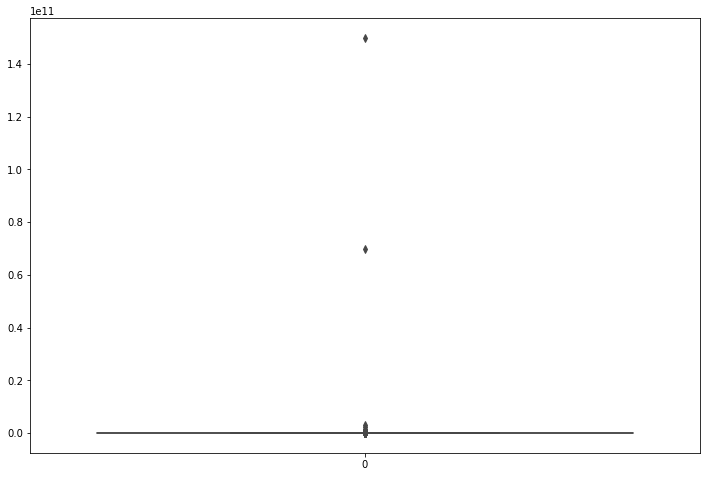

In [173]:
# Plot to show outliers
plt.figure(figsize=(12,8))
sns.boxplot(data=data['Amount($)'], palette='magma')
plt.show()

# Answering the Questions

# Multivariate

##### Q1. Which Sector received the highest funding?

In [174]:
sector_amount=data.groupby(['Sector']).count()['Amount($)'].sort_values(ascending=False).reset_index().head(10)
sector_amount

,Sector,Amount($)
0,FinTech,331
1,EdTech,191
2,Health,118
3,E-commerce,86
4,Food,66
5,Agritech,55
6,Automotive,46
7,Information technology & services,36
8,Media,35
9,Games,33


<function matplotlib.pyplot.show(close=None, block=None)>

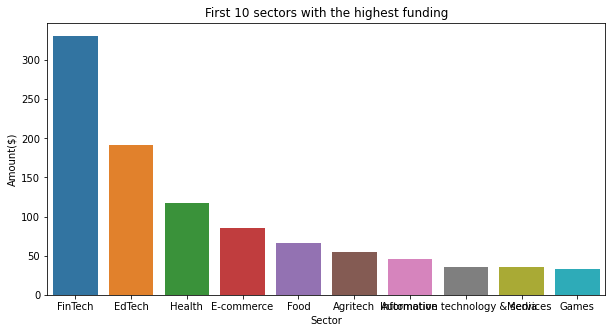

In [175]:
# Ploting the sectors that received the highest funding
first10sectors=data.groupby('Sector')['Amount($)'].count().sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(y='Amount($)', x='Sector', data=first10sectors.reset_index().head(10))
plt.title('First 10 sectors with the highest funding')
plt.show

##### Q2. Is there a relationship between the Age of Company and Amount of funding sourced?

In [176]:
company_age_amount=data.groupby(['Founded']).count()['Amount($)'].sort_values(ascending=False).reset_index().head(10)
company_age_amount

,Founded,Amount($)
0,2015.0,242
1,2020.0,232
2,2019.0,223
3,2018.0,217
4,2016.0,193
5,2017.0,170
6,2014.0,120
7,2021.0,67
8,2011.0,64
9,2012.0,63


<function matplotlib.pyplot.show(close=None, block=None)>

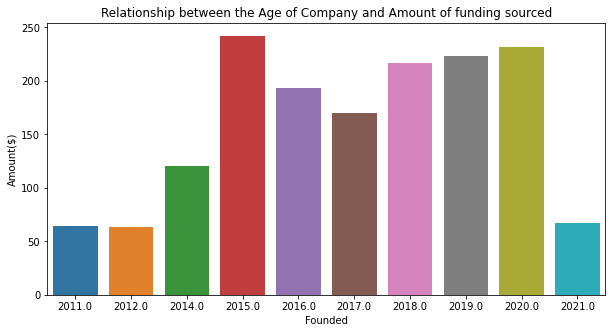

In [177]:
# Ploting the relationship between the Age of Company and Amount of funding sourced? 
first10sectors=data.groupby('Founded')['Amount($)'].count().sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(y='Amount($)', x='Founded', data=first10sectors.reset_index().head(10))
plt.title('Relationship between the Age of Company and Amount of funding sourced')
plt.show

##### Q3.Which investors give the highest funding?

In [178]:
investor_funding=data.groupby(['Investor']).count()['Amount($)'].sort_values(ascending=False).reset_index().head(10)
investor_funding

,Investor,Amount($)
0,Inflection Point Ventures,32
1,Venture Catalysts,14
2,Tiger Global,12
3,Angel investors,11
4,Others,10
5,Alteria Capital,9
6,Sequoia Capital India,9
7,Titan Capital,8
8,Mumbai Angels Network,7
9,Elevation Capital,7


<function matplotlib.pyplot.show(close=None, block=None)>

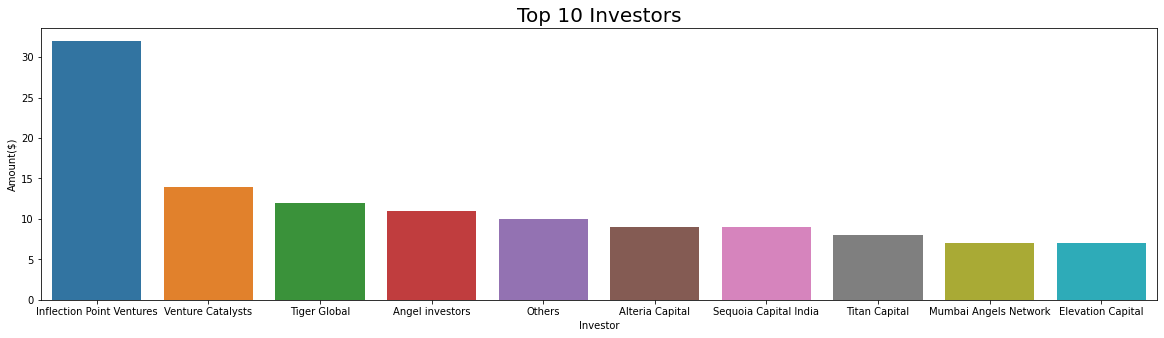

In [179]:
# Ploting the sectors that received the highest funding
first10sectors=data.groupby('Investor')['Amount($)'].count().sort_values(ascending=False)
plt.figure(figsize=(20,5))
sns.barplot(y='Amount($)', x='Investor', data=first10sectors.reset_index().head(10))
plt.title('Top 10 Investors', fontsize=20)
plt.show

##### Q4. Is location a factor in sourcing funding?

In [180]:
data.groupby(['HeadQuarter']).count()['Amount($)'].sort_values(ascending=False).reset_index().head(10)

,HeadQuarter,Amount($)
0,Bangalore,719
1,Mumbai,382
2,Gurugram,210
3,New Delhi,185
4,Chennai,93
5,Pune,77
6,Gurgaon,65
7,Hyderabad,64
8,Noida,63
9,Delhi,59


<function matplotlib.pyplot.show(close=None, block=None)>

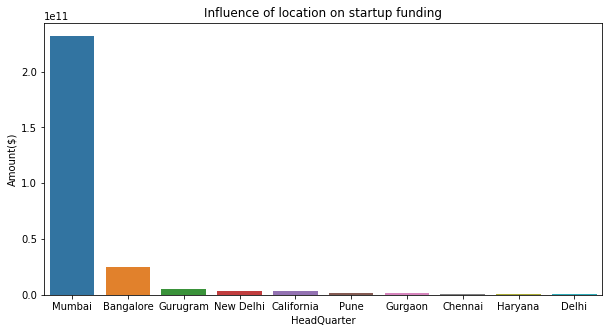

In [181]:
# Ploting the sectors that received the highest funding
first10sectors=data.groupby('HeadQuarter')['Amount($)'].sum().sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(y='Amount($)', x='HeadQuarter', data=first10sectors.reset_index().head(10))
plt.title('Influence of location on startup funding')
plt.show

##### Q5. Which type of funding is mostly accessed?

In [182]:
funding_stage=data.groupby(['Stage']).count()['Amount($)'].sort_values(ascending=False).reset_index().head(10)
funding_stage

,Stage,Amount($)
0,Seed,440
1,Series A,290
2,Pre-series A,177
3,Series B,130
4,Series C,114
5,Series D,50
6,Pre series A,45
7,Debt,45
8,Seed Round,44
9,Pre-seed,43


<function matplotlib.pyplot.show(close=None, block=None)>

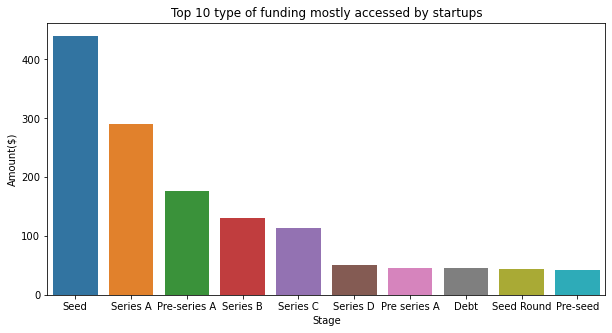

In [183]:
# Ploting the sectors that attracted more investors
first10sectors=data.groupby('Stage')['Amount($)'].count().sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(y='Amount($)', x='Stage', data=first10sectors.reset_index().head(10))
plt.title('Top 10 type of funding mostly accessed by startups')
plt.show

##### Q6. Which sector attract more investors

In [184]:
sector_invested=data.groupby(['Sector']).count()['Investor'].sort_values(ascending=False).reset_index().head(10)
sector_invested

,Sector,Investor
0,FinTech,313
1,EdTech,213
2,Health,131
3,E-commerce,73
4,Agritech,61
5,Food,61
6,Games,34
7,Information technology & services,33
8,Logistics,33
9,Cloud computing,32


<function matplotlib.pyplot.show(close=None, block=None)>

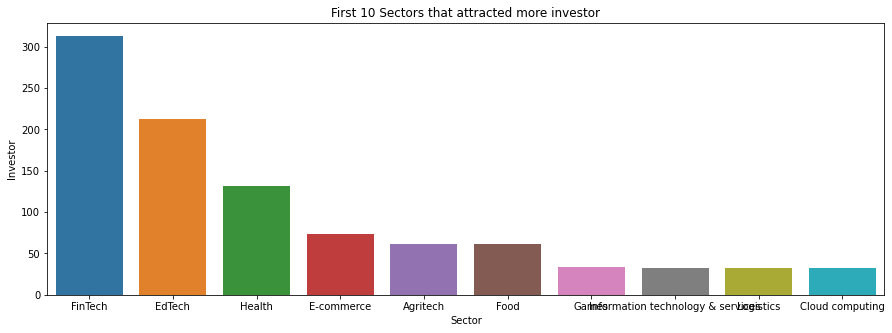

In [187]:
# Ploting the sectors that attracted more investors
first10sectors=data.groupby('Sector')['Investor'].count().sort_values(ascending=False)
plt.figure(figsize=(15,5))
sns.barplot(y='Investor', x='Sector', data=first10sectors.reset_index().head(10))
plt.title('First 10 Sectors that attracted more investor')
plt.show

# Missing/NaN Values

Handle the missing/NaN values using the Scikif-learn SimpleImputer

In [ ]:
#Checking which columns have missing values
data.isnull().sum()

In [ ]:
# Replace NaN values with 0
data['Amount($)'] = data['Amount($)'].replace(np.nan, 0, regex=True)

In [ ]:
# Checking which columns have missing values
data.isnull().sum()

In [ ]:
# Checking for duplicate value
data.duplicated().sum()

In [ ]:
# Drop duplicated values
data.drop_duplicates(inplace=True)

In [ ]:
# Check to see if duplicated value are dropped
data.duplicated().sum()

# Scaling

Scale the numeric features using the Scikif-learn StandardScaler, MinMaxScaler, or another Scaler.

# Encoding

Encode the categorical features using the Scikif-learn OneHotEncoder